# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.665146e+01     1.589537e+01
 * time: 0.0017139911651611328
     1     3.051277e+01     6.986590e+00
 * time: 0.007061958312988281
     2     2.592613e+01     3.139705e+00
 * time: 0.013478994369506836
     3     2.212055e+01     1.962359e+00
 * time: 0.019006013870239258
     4     2.030109e+01     2.416824e+00
 * time: 0.024558067321777344
     5     1.938204e+01     1.487748e+00
 * time: 0.030169963836669922
     6     1.901199e+01     2.018920e+00
 * time: 0.03478598594665527
     7     1.871582e+01     1.404259e+00
 * time: 0.039201974868774414
     8     1.820528e+01     1.127784e+00
 * time: 0.07175588607788086
     9     1.783476e+01     1.008253e+00
 * time: 0.07584691047668457
    10     1.761141e+01     6.961481e-01
 * time: 0.07974600791931152
    11     1.748867e+01     8.464307e-01
 * time: 0.08376383781433105
    12     1.739557e+01     5.794050e-01
 * time: 0.08772683143615723
    13     1.731392e+01     4.516309e-01


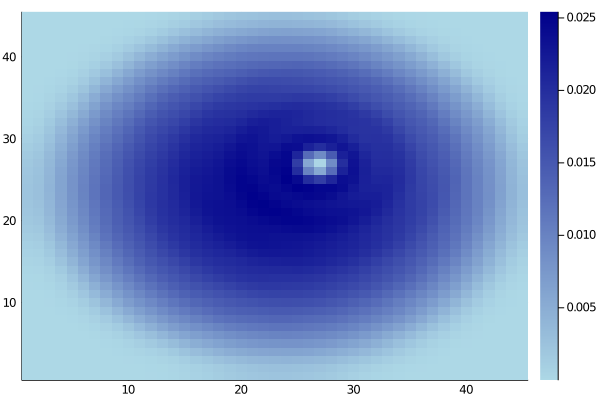

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)